In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

Image (#9): Which is digit '4'


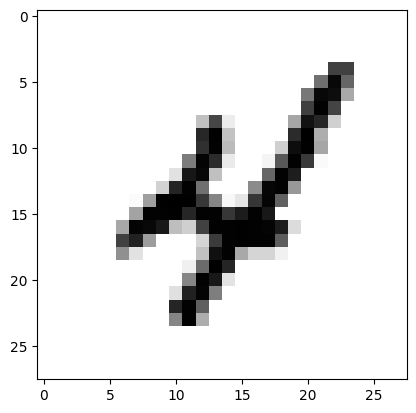

In [19]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

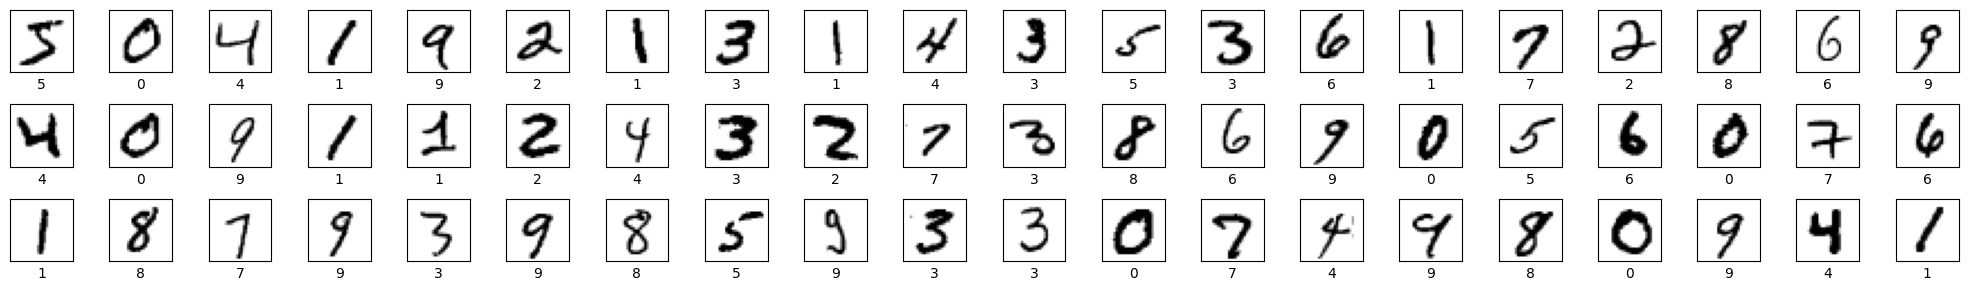

In [20]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
h = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 42s 15ms/step - loss: 0.1439 - accuracy: 0.9560 - val_loss: 0.0472 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 68s 37ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0285 - val_accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0240 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0294 - val_accuracy: 0.9912


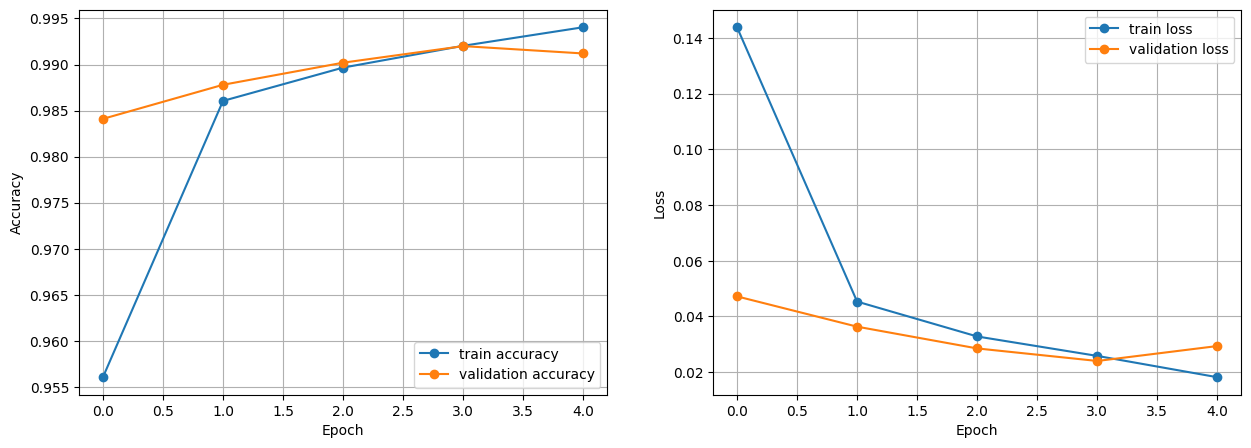

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [28]:
sgd_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
sgd_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [29]:
sgd_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
g = sgd_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5977 - accuracy: 0.8274 - val_loss: 0.1956 - val_accuracy: 0.9388
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1449 - accuracy: 0.9552 - val_loss: 0.0953 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0992 - accuracy: 0.9694 - val_loss: 0.0722 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0797 - accuracy: 0.9751 - val_loss: 0.0587 - val_accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0520 - val_accuracy: 0.9841


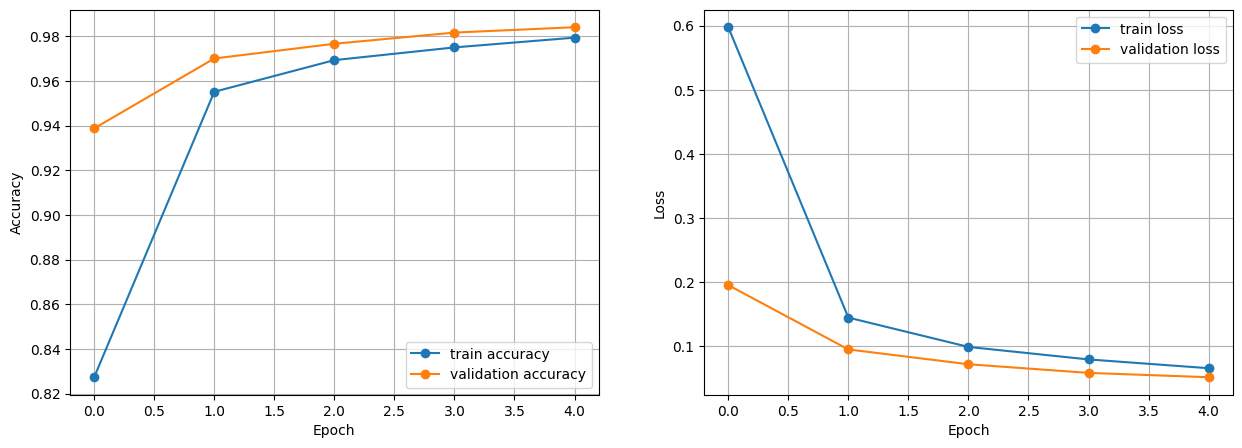

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(g.history['accuracy'], 'o-', label='train accuracy')
plt.plot(g.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(g.history['loss'], 'o-', label='train loss')
plt.plot(g.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [7]:
rmsprop_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
rmsprop_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [8]:
rmsprop_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
e = rmsprop_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 42s 18ms/step - loss: 0.1402 - accuracy: 0.9574 - val_loss: 0.0348 - val_accuracy: 0.9894
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0375 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0239 - accuracy: 0.9930 - val_loss: 0.0301 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0296 - val_accuracy: 0.9918


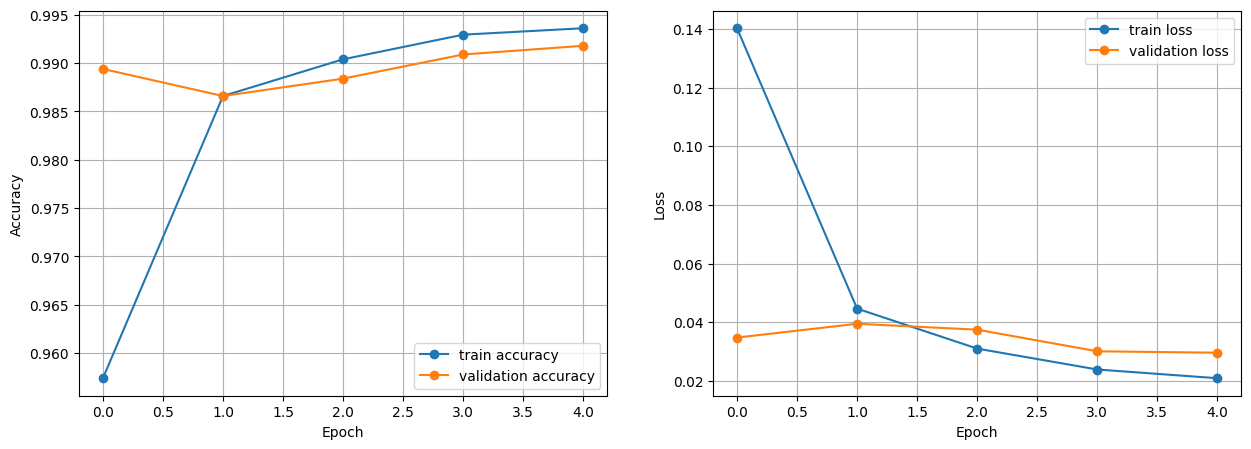

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(e.history['accuracy'], 'o-', label='train accuracy')
plt.plot(e.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(e.history['loss'], 'o-', label='train loss')
plt.plot(e.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

<h1>So, We can see that the average accuracy of the ADAM optimizer is the highest and loss of this is the lowest.<h1>